In [116]:
#importing liabary
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.metrics import *

In [117]:
#importing the dataset in to jupyter note book
df=pd.read_csv("C:/Users/DELL/Downloads/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [118]:
Y=pd.DataFrame(df['diagnosis'].values,columns=['diagnosis'])
X=df.drop(['diagnosis','id'],axis=1)

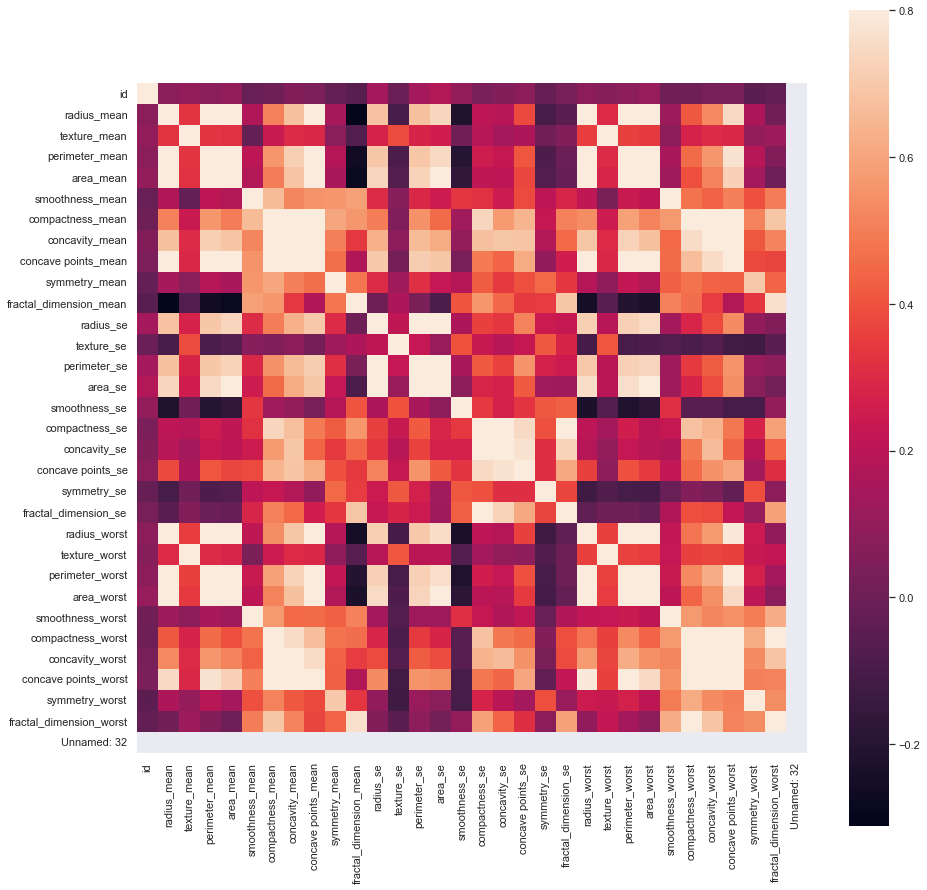

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

C_mat = df.corr()
fig = plt.figure(figsize=(15, 15))
sns.heatmap(C_mat, vmax=0.8, square=True)
plt.show()

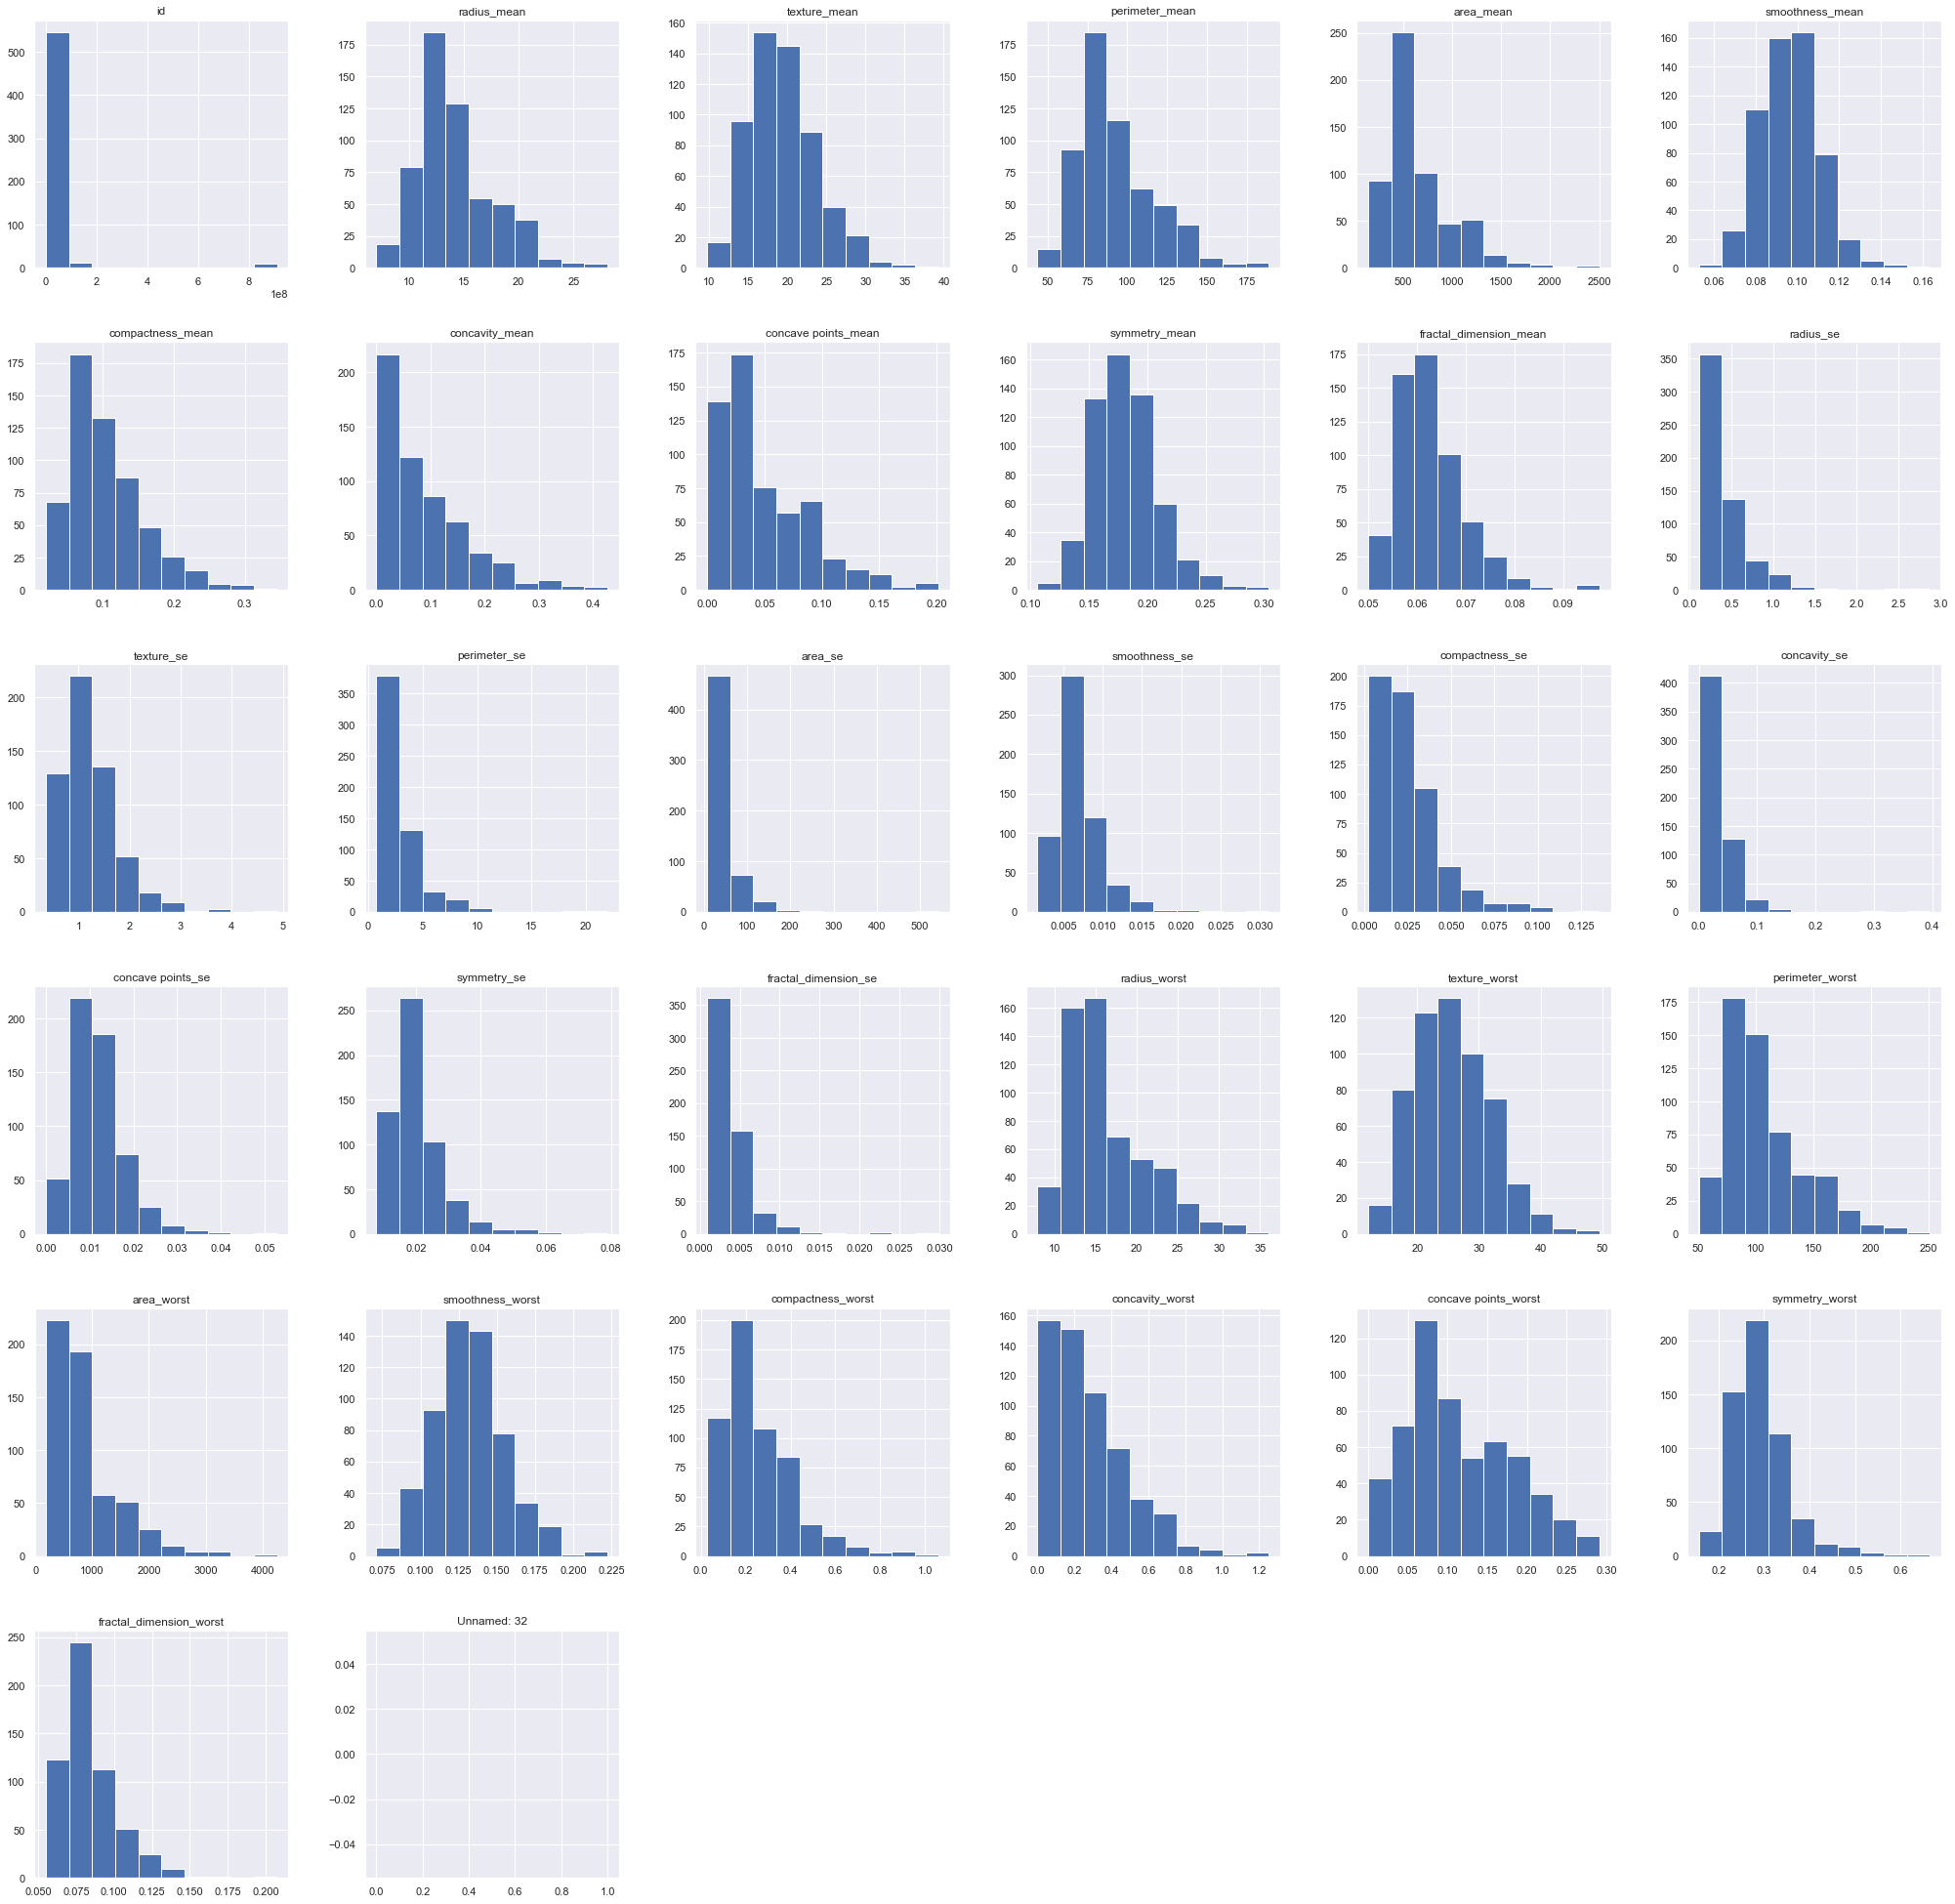

In [120]:
df.hist(figsize = (35,35))
plt.show()

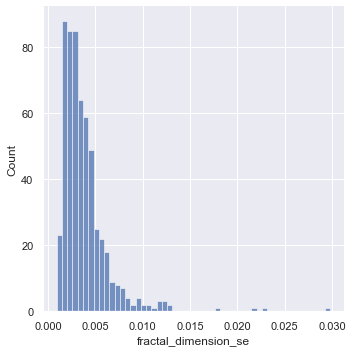

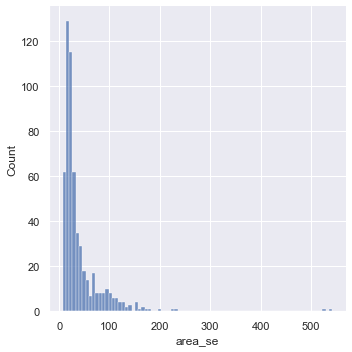

In [121]:
import seaborn as sns
sns.displot(df['fractal_dimension_se']);
sns.displot(df['area_se']);

In [122]:
import numpy as np
df['new_fractal_dimension_se']=np.log(df['fractal_dimension_se'].values)
df['new_area_se']=np.log(df['area_se'].values)

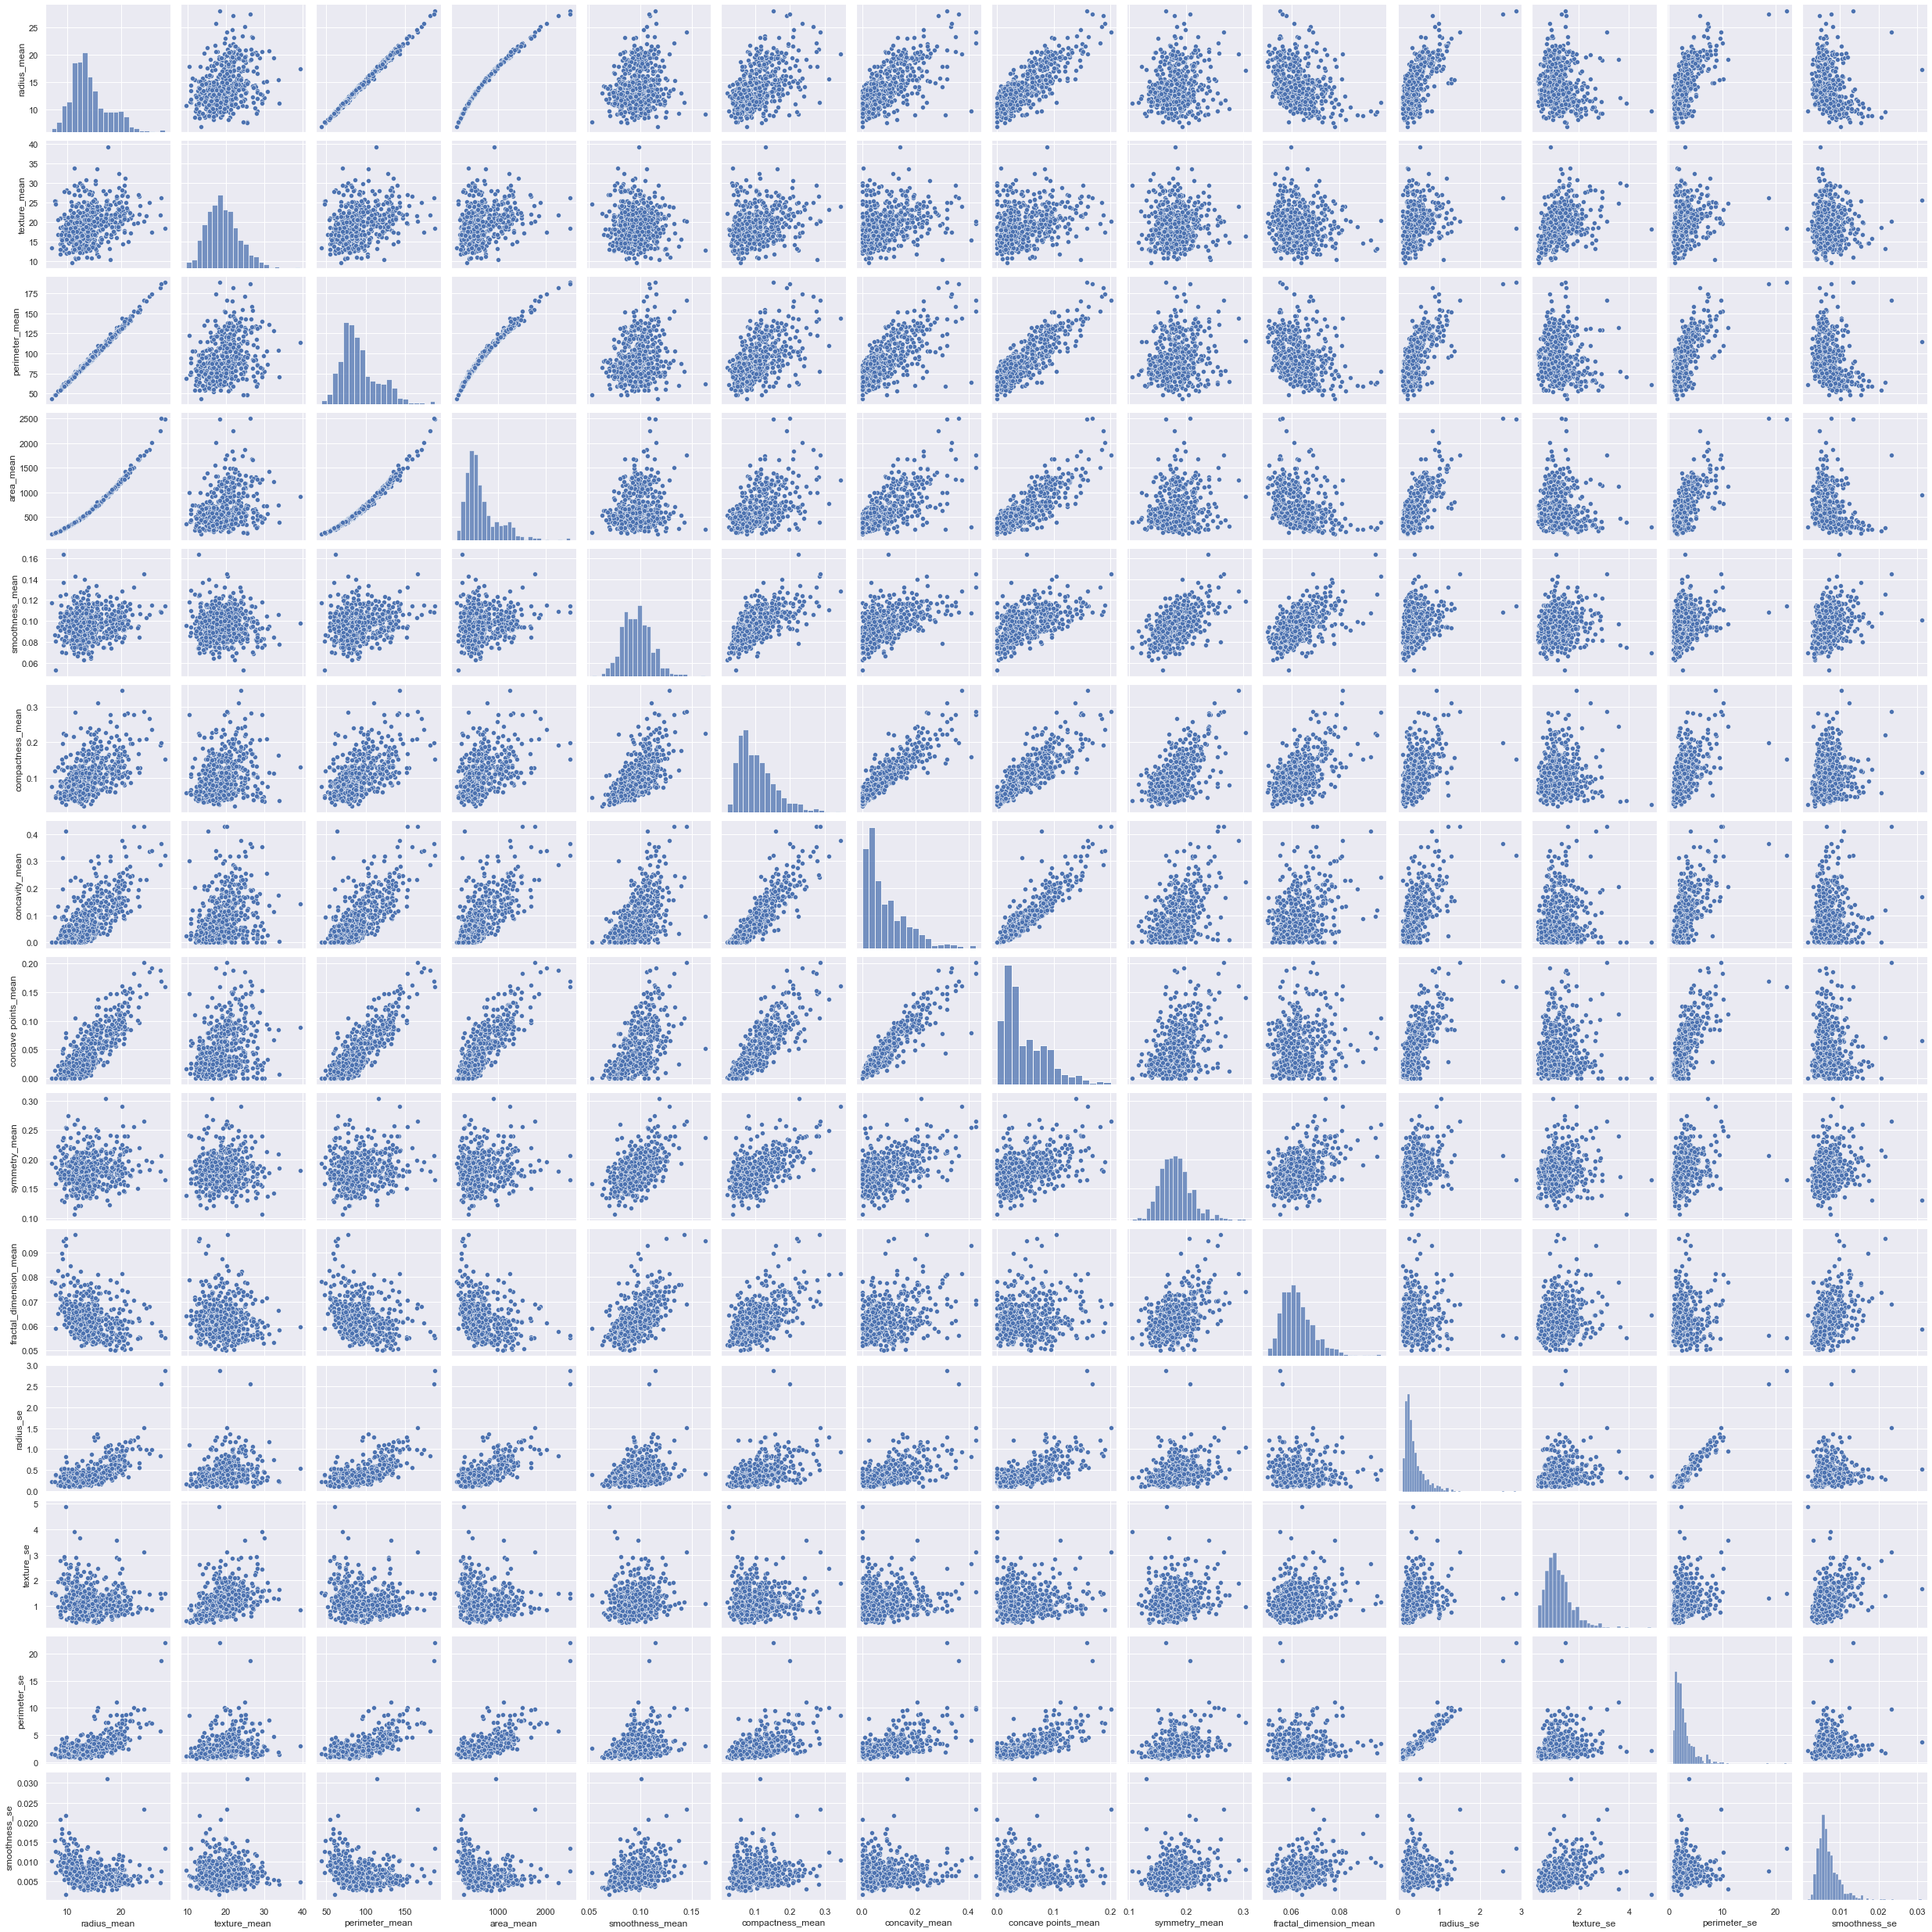

In [123]:
import seaborn as sns
sns.set()
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',       'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se']
sns.pairplot(df[cols], height=2.5)
plt.show();


In [ ]:
data = pd.concat([df['radius_mean'], df['concavity_mean']], axis=1)
data.plot.scatter(x='concavity_mean', y='radius_mean')

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="diagnosis")

In [ ]:
print(df.isnull().sum())

In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# read the data
data = pd.read_csv("C:/Users/91836/Downloads/data.csv")

# separate target variable
y = data['diagnosis']

# drop target variable and unnecessary features
X = data.drop(['id', 'Unnamed: 32'], axis=1)

# convert categorical variables to numerical using One-Hot Encoding
cat_cols = ['diagnosis']  # replace with actual categorical columns
X = pd.get_dummies(X, columns=cat_cols)

# impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# perform KMeans clustering
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(X_imputed)

KMeans(n_clusters=2)

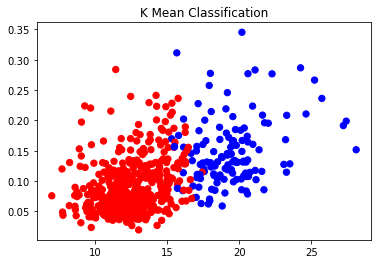

In [13]:
import numpy as np
import matplotlib.pyplot as plt
colormap = np.array(['red','blue'])
plt.scatter(X['radius_mean'], X['compactness_mean'],c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.show()

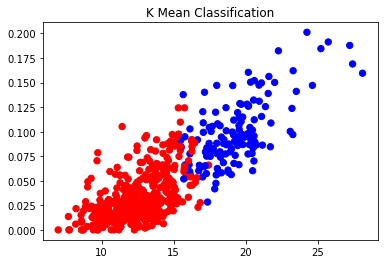

In [14]:
import numpy as np
import matplotlib.pyplot as plt
colormap = np.array(['red','blue'])
plt.scatter(X['radius_mean'], X['concave points_mean'],c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.show()

Text(0, 0.5, 'Count')

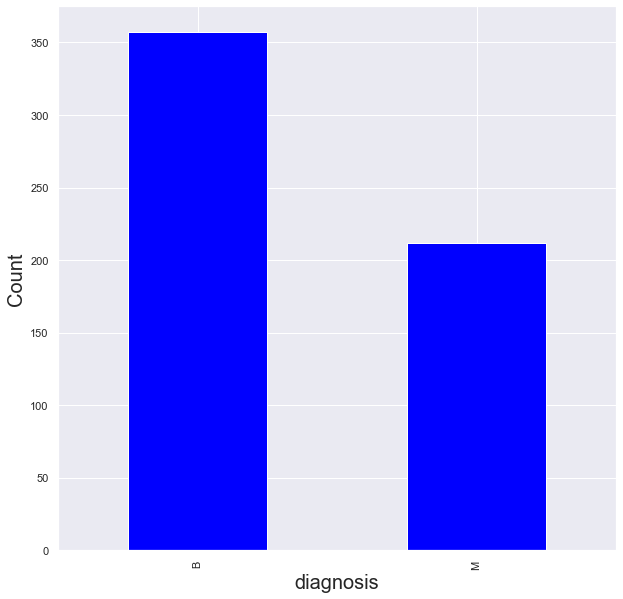

In [33]:
import matplotlib.pyplot as plt
feature = "diagnosis"
ax = df[feature].value_counts().plot(kind='bar',
                                    figsize=(10,10), 
                                    color='blue')
ax.set_xlabel(feature, fontsize=20)
ax.set_ylabel("Count",fontsize=20)

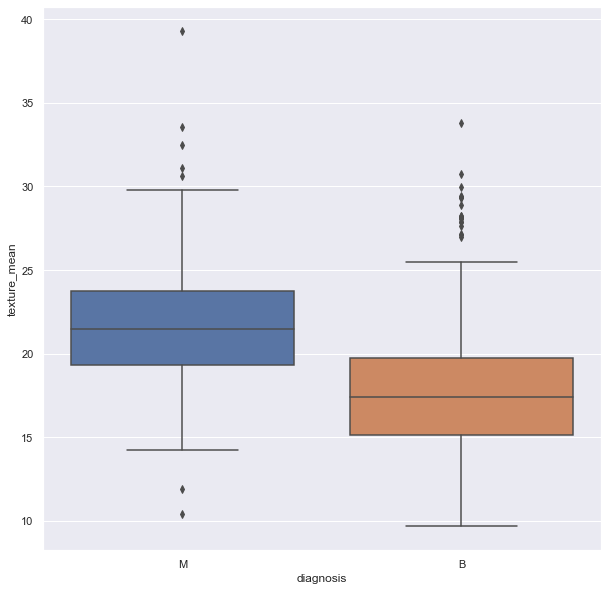

In [34]:
data = pd.concat([df['texture_mean'], df['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x='diagnosis', y="texture_mean", data=data)

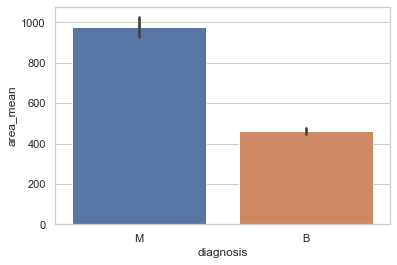

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="diagnosis", y="area_mean", data=df)

Part 2

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale=scaler.fit(X)
X_scaled=scaler.transform(X)
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PC = pca.fit_transform(X_scaled_df)
p_Df = pd.DataFrame(data = PC
             , columns = ['principal component 1', 'principal component 2'])
p_Df.head()

,principal component 1,principal component 2
0,9.254910,2.278177
1,2.916354,-3.797089
2,6.044771,-0.936242
3,7.157587,10.354419
4,4.319384,-1.862546


In [17]:
Y_l=Y.iloc[:]['diagnosis'].tolist()
joined=p_Df
joined['Diagnosis']=Y_l
joined.head()

,principal component 1,principal component 2,Diagnosis
0,9.254910,2.278177,M
1,2.916354,-3.797089,M
2,6.044771,-0.936242,M
3,7.157587,10.354419,M
4,4.319384,-1.862546,M


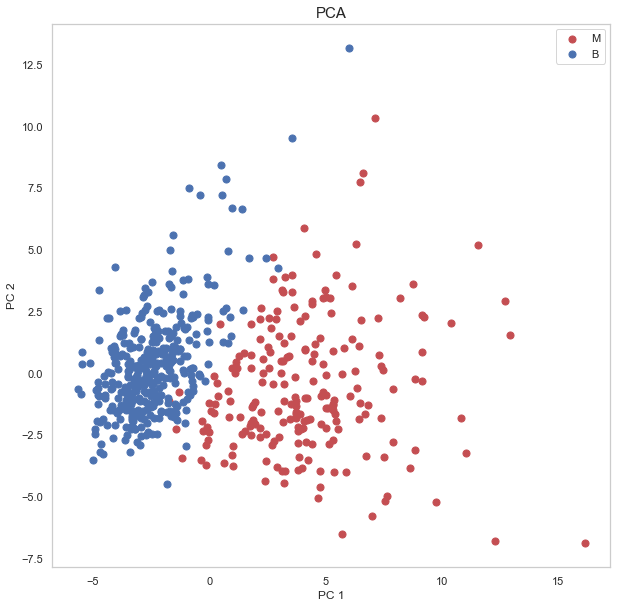

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 12)
ax.set_ylabel('PC 2', fontsize = 12)
ax.set_title('PCA', fontsize = 15)
diags=['M','B']
colors=['r','b']
for diag, color in zip(diags,colors):
    i = joined['Diagnosis'] == diag
    ax.scatter(joined.loc[i, 'principal component 1']
               , joined.loc[i, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(diags)
ax.grid()

In [22]:

# load data
df = pd.read_csv("C:/Users/91836/Downloads/data.csv")

# encode categorical column to numerical values
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])

# separate features and target variable
X = df.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)
y = df["diagnosis"]

# standardize the data
sc = StandardScaler()
X_std = sc.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# print the explained variance ratio
print(pca.explained_variance_ratio_)


[0.44272026 0.18971182]


In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
X_n = X.values
Y_n = Y.values.ravel()  # flatten Y to a 1D array
rfc.fit(X_n, Y_n)
importance = rfc.feature_importances_


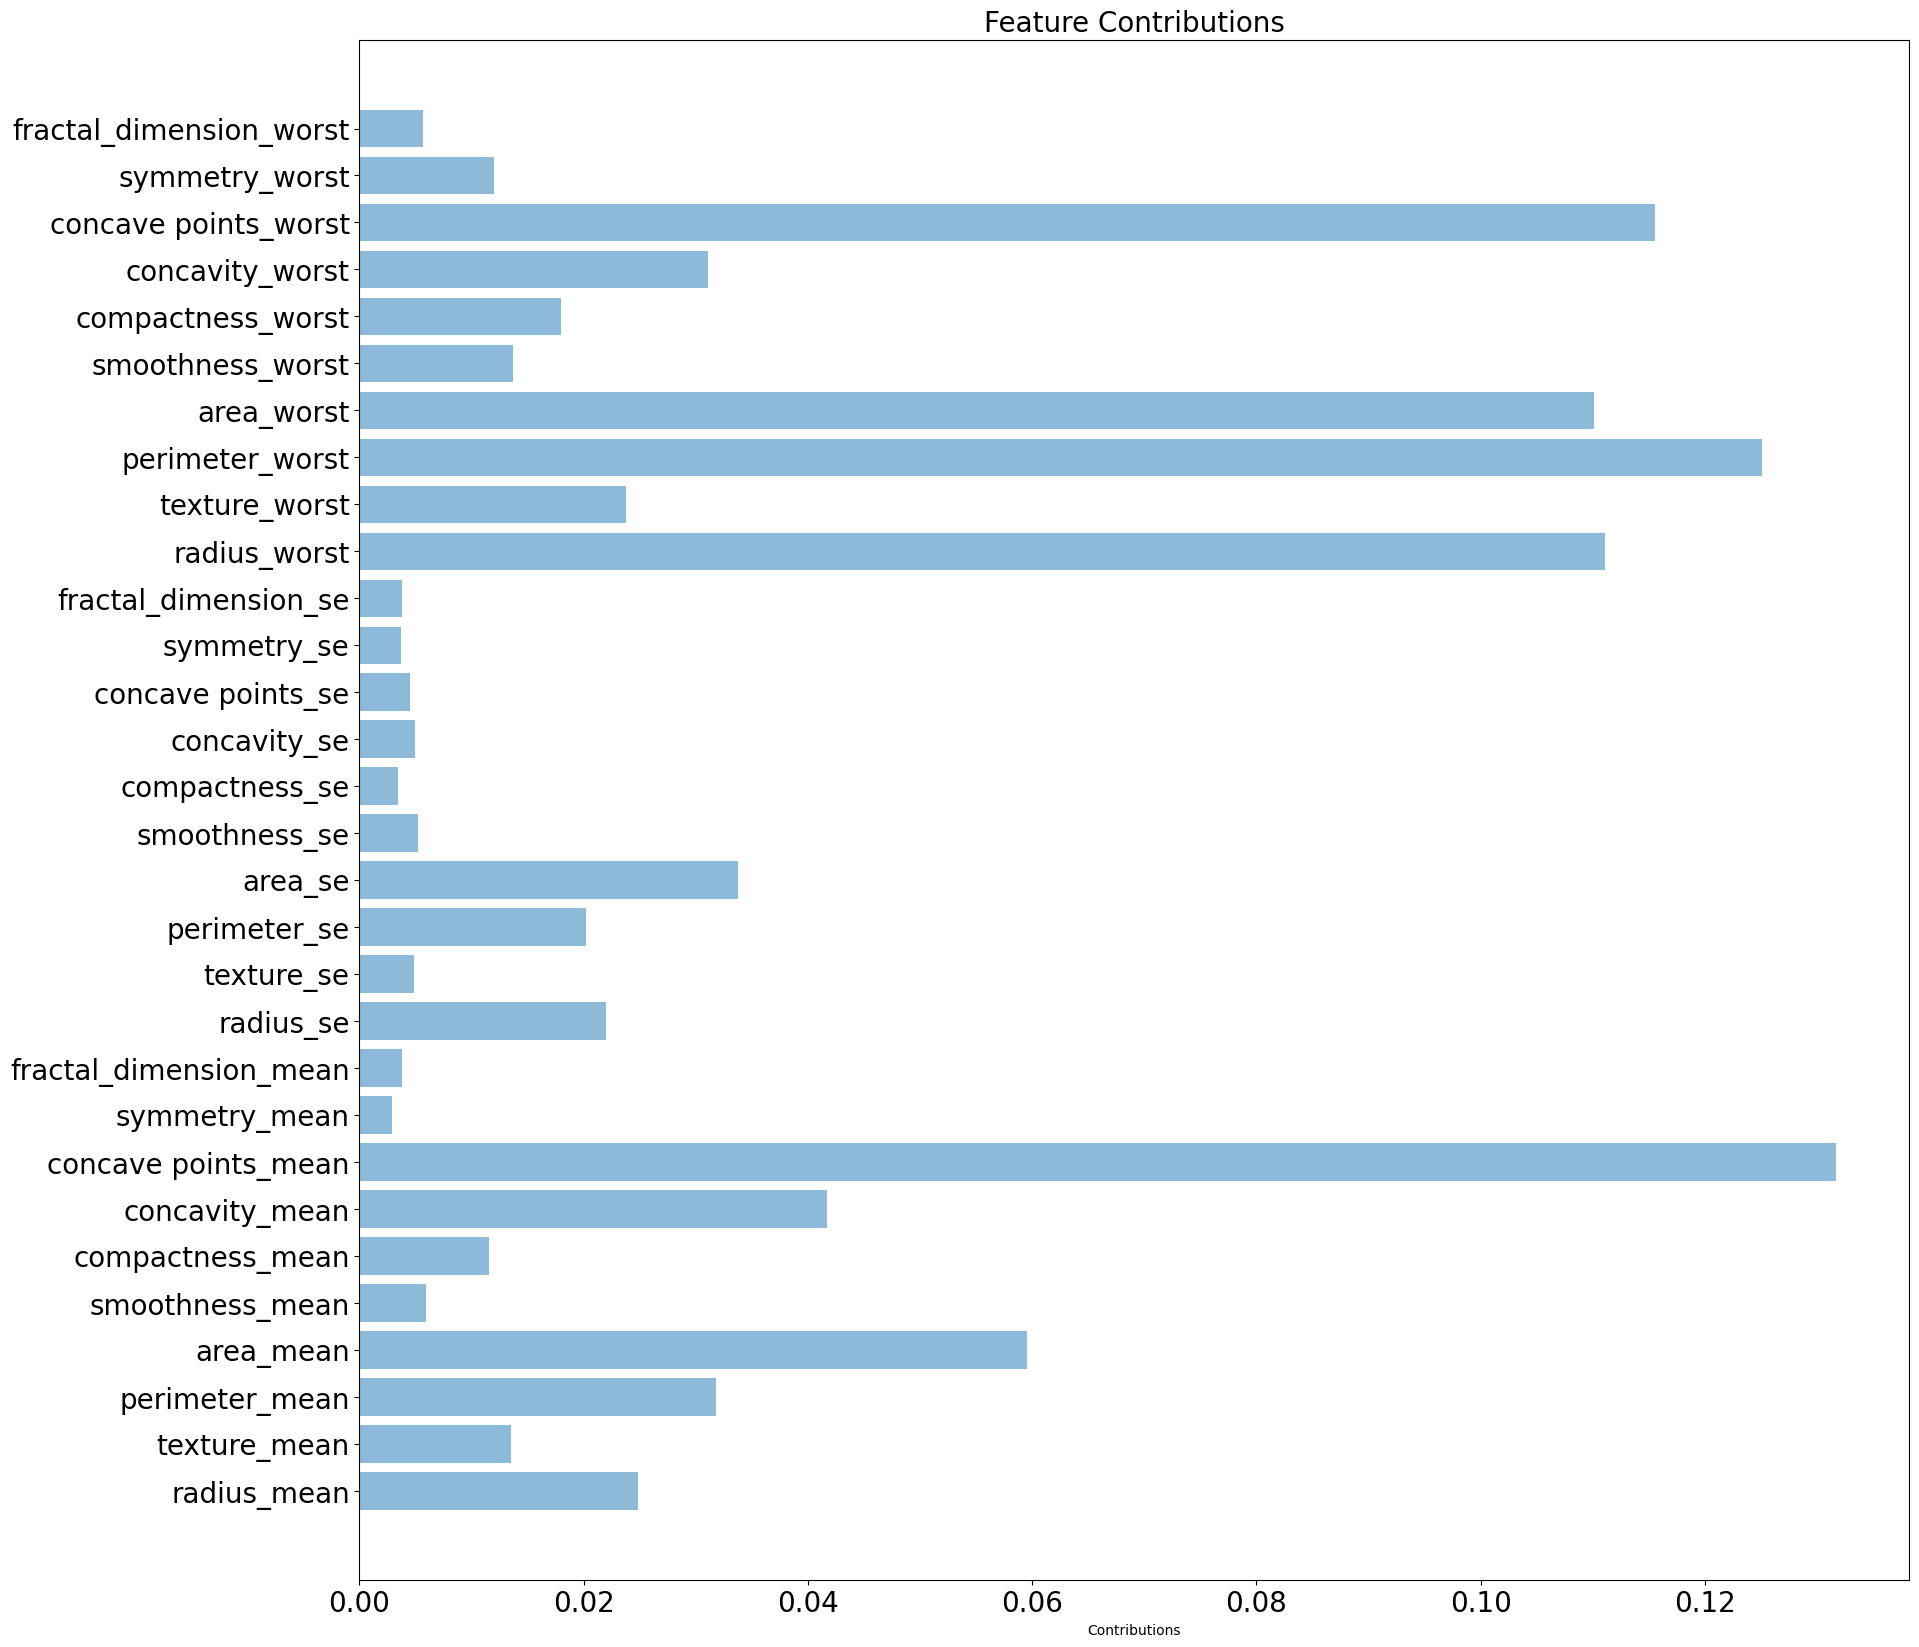

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
objects = X.columns
y_pos = np.arange(len(objects))
performance = importance
fig, ax = plt.subplots(figsize=(20, 20))
plt.barh(y_pos, performance, align='center', alpha=0.5)
fontsize=14,
plt.yticks(y_pos, objects,fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Contributions')
plt.title('Feature Contributions',fontsize=20)
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_n, Y_n)
Weights=np.hstack((model.intercept_[:,None], model.coef_))
k=X.columns.tolist()
k.append('bias')


In [30]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso(alpha=0.0001, max_iter=100000)
i = 0
y_d = []
while i < len(Y_n):
    if Y_n[i][0] == 'M':
        y_d.append([1])
    else:
        y_d.append([0])
    i += 1
y_d = np.array(y_d)
lasso.fit(X_n, y_d)

l = (lasso.coef_)



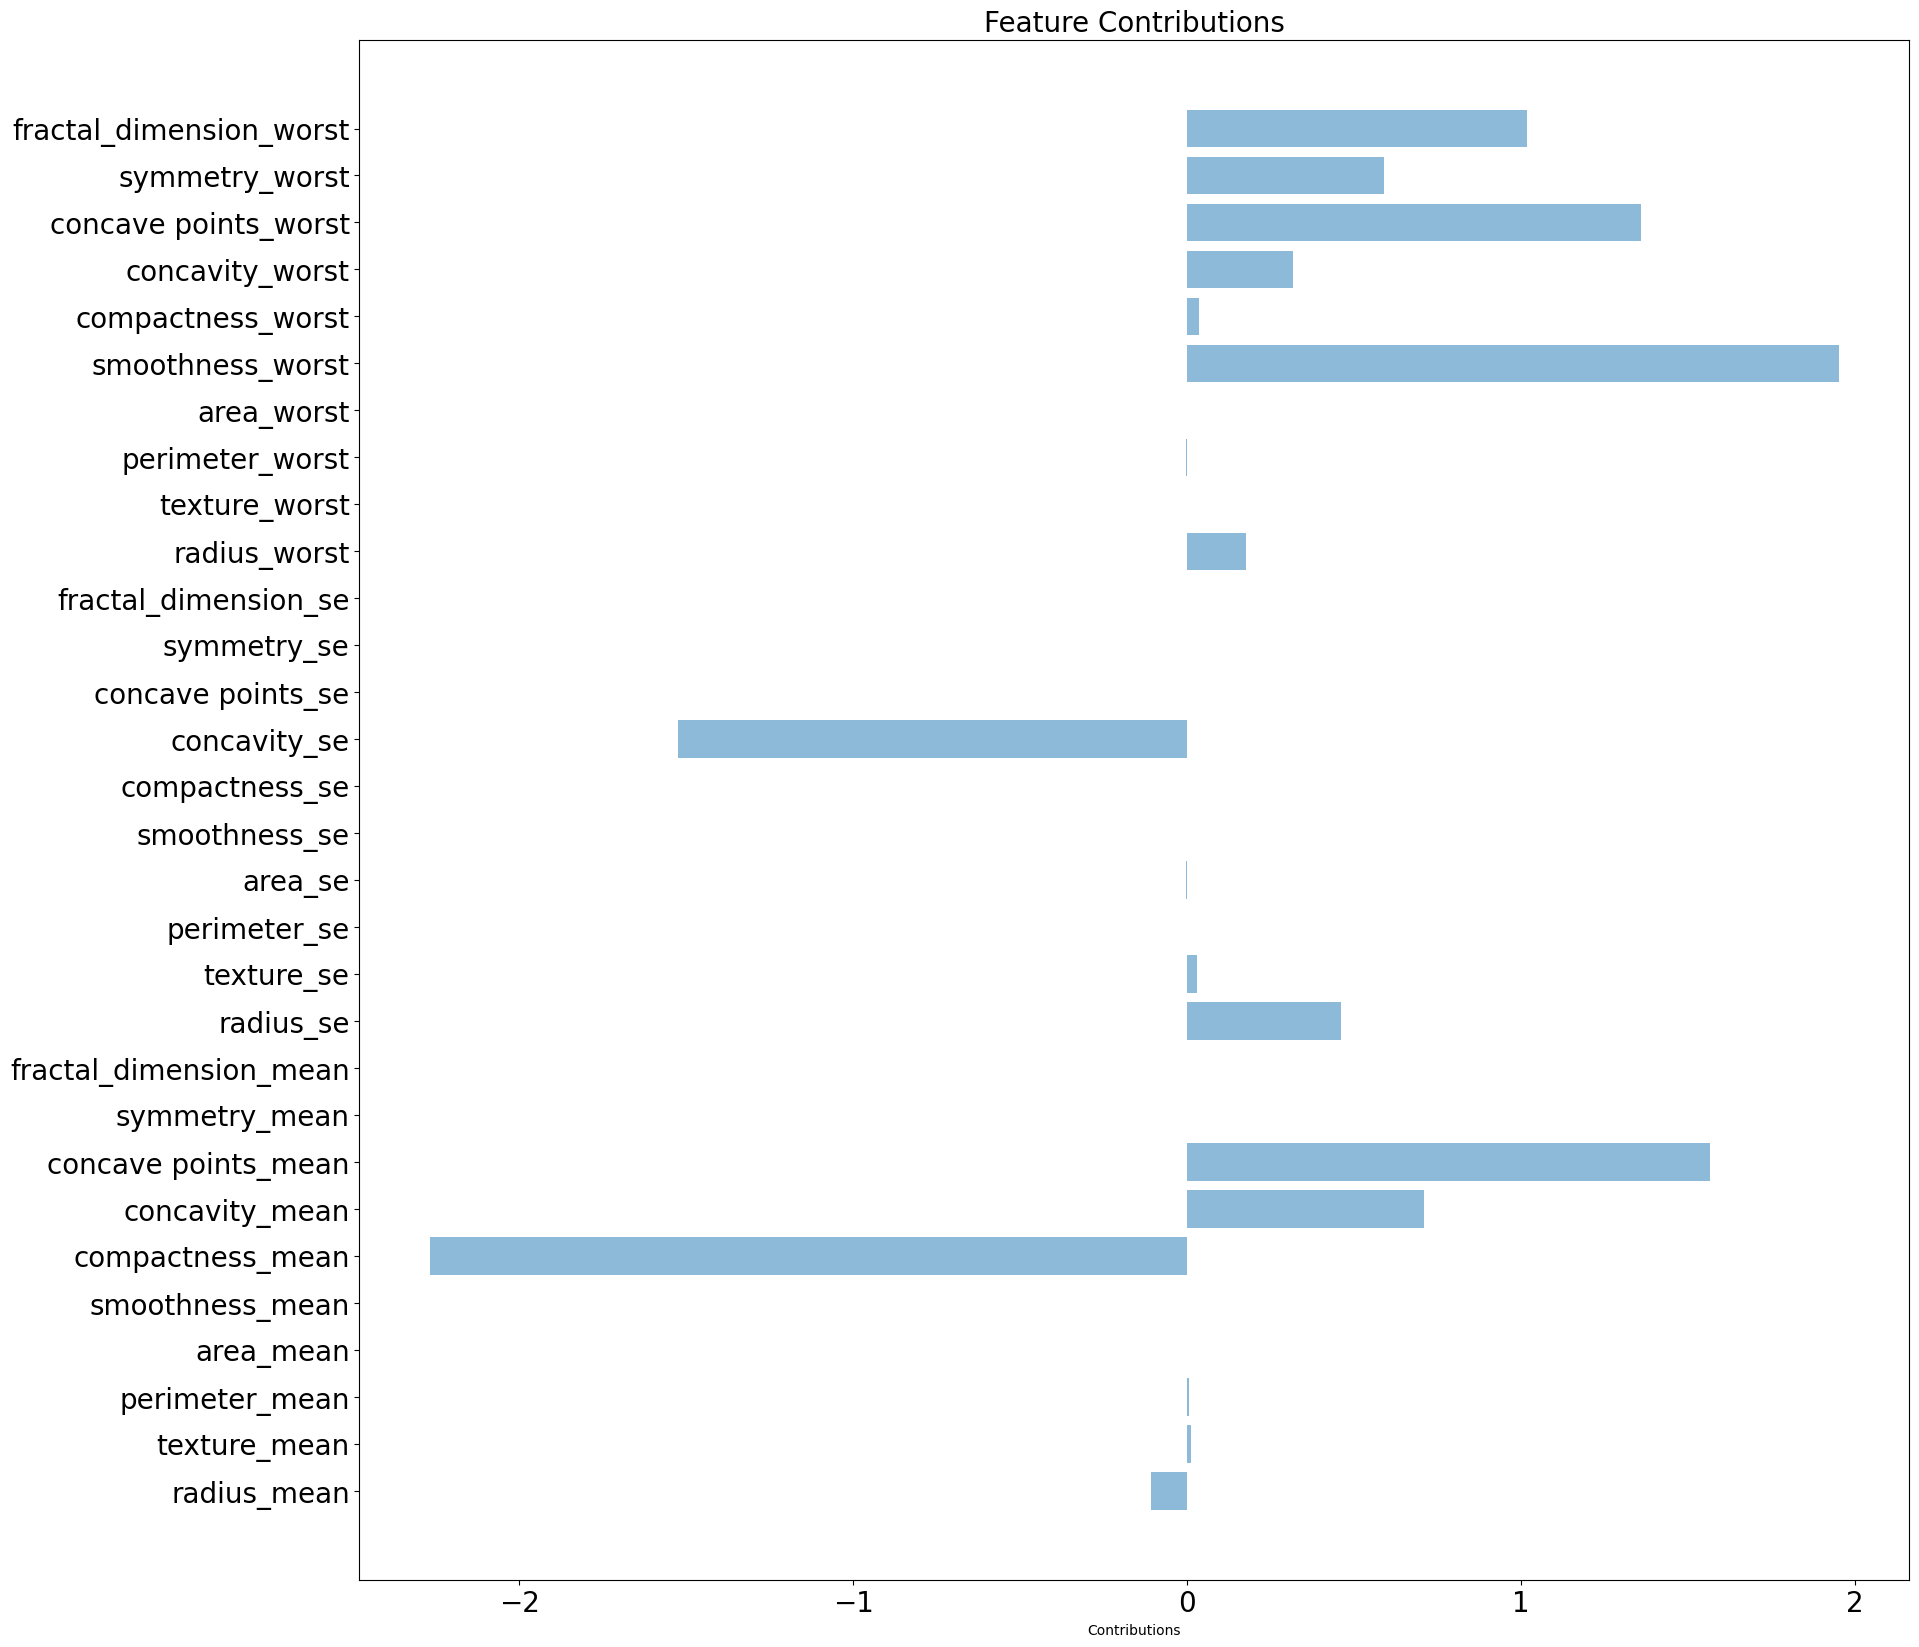

In [31]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
objects = X.columns
y_pos = np.arange(len(objects))
performance = l
fig, ax = plt.subplots(figsize=(20, 20))
plt.barh(y_pos, performance, align='center', alpha=0.5)
fontsize=14,
plt.yticks(y_pos, objects,fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Contributions')
plt.title('Feature Contributions',fontsize=20)
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_n,Y_n)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [34]:
features=rfecv.n_features_
features

17

In [38]:
n_p=np.where(rfecv.support_ == False)[0]

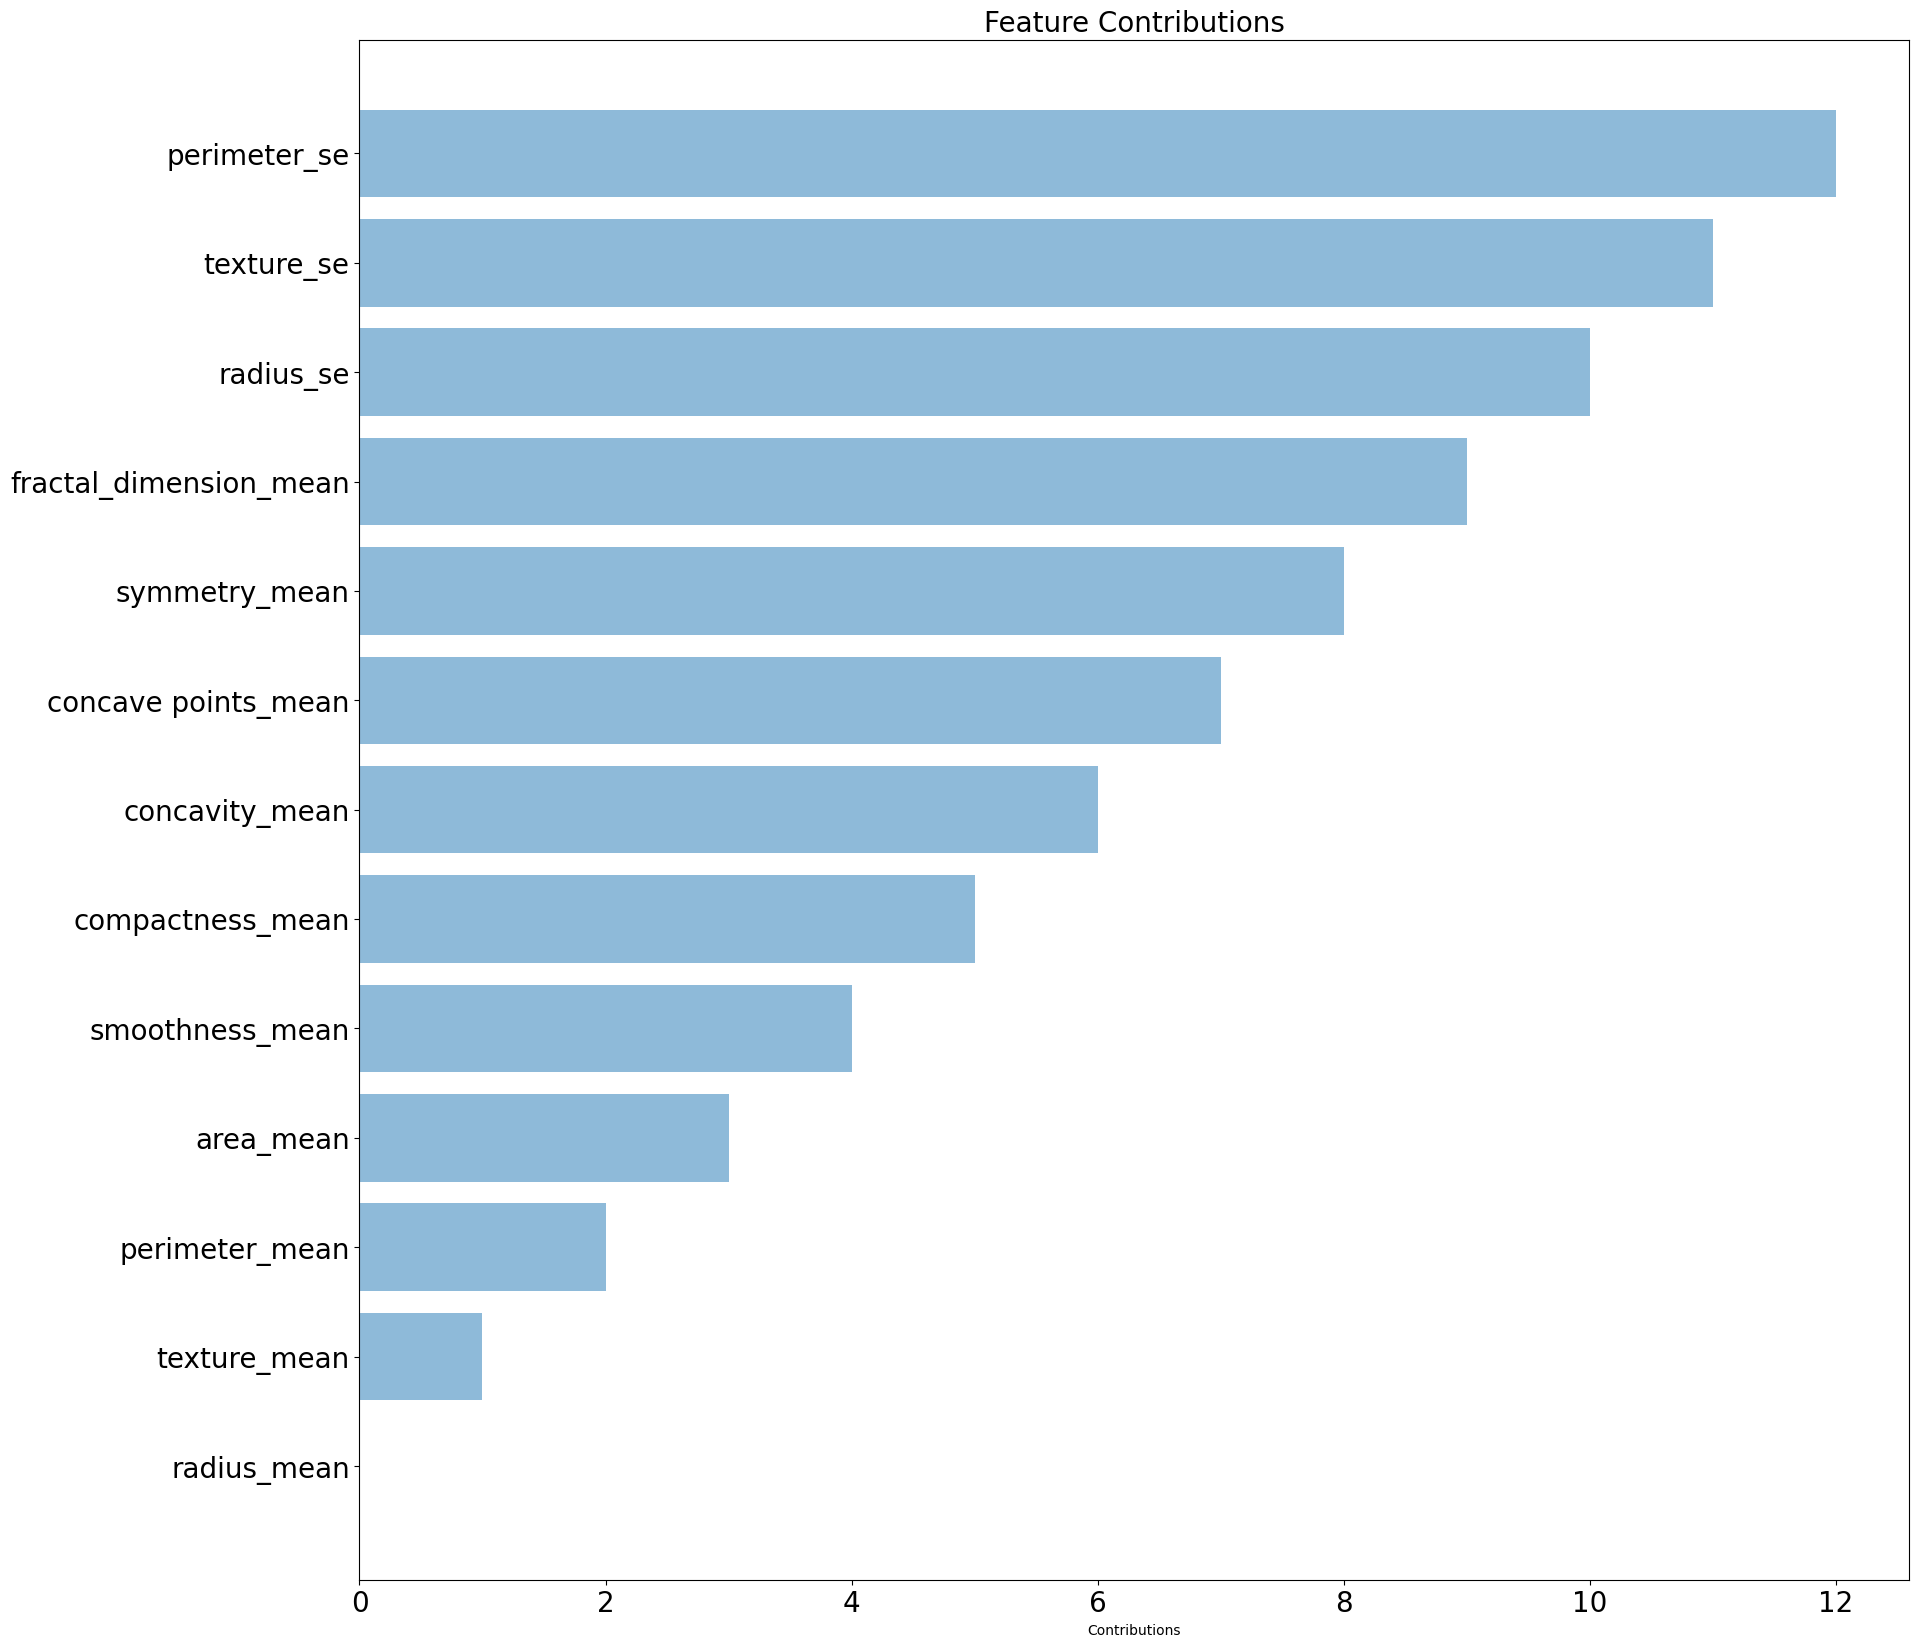

In [58]:
feat=X.columns
to_drop=[]
for i in range(len(n_p)):
    if n_p[i] == 0: # check if feature importance score is 0
        to_drop.append(feat[i])
x_imp=X.drop(to_drop,axis=1)

import matplotlib.pyplot as plt
import numpy as np

objects = x_imp.columns
y_pos = np.arange(len(n_p[:len(performance)]))

performance = y_pos
fig, ax = plt.subplots(figsize=(20, 20))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos[:len(performance)], objects[:len(performance)], fontsize=20)


plt.xticks(fontsize=20)
plt.xlabel('Contributions')
plt.title('Feature Contributions',fontsize=20)
plt.show()


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale=scaler.fit(X_train)
X_train_scaled=scale.transform(X_train)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [64]:
x_test_scaled=scale.transform(X_test)
y_pred=model.predict(x_test_scaled)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9787234042553191

In [99]:
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

# Create a sample dataframe
y_test = ['M', 'B', 'M', 'M', 'B', 'B', 'M', 'B']
y_pred = [0.9, 0.2, 0.8, 0.7, 0.3, 0.1, 0.6, 0.4]

# Convert y_test to binary labels
y_test_bin = np.where(np.array(y_test) == 'M', 1, 0)

# Convert y_pred to binary predictions
y_pred_bin = np.where(np.array(y_pred) > 0.5, 1, 0)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test_bin, y_pred_bin)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 1.0


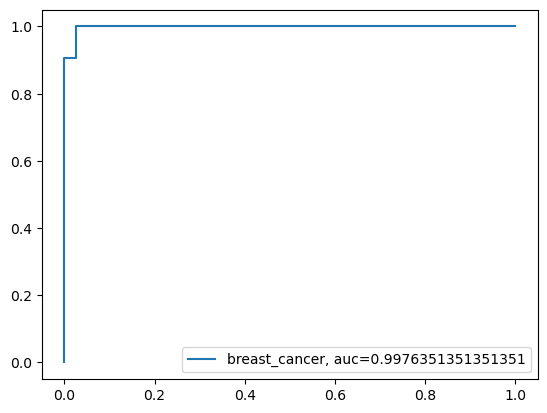

In [111]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load breast cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train logistic regression classifier with scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)

# Predict probabilities on test set
y_pred = clf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label="breast_cancer, auc="+str(auc))
plt.legend(loc=4)
plt.show()


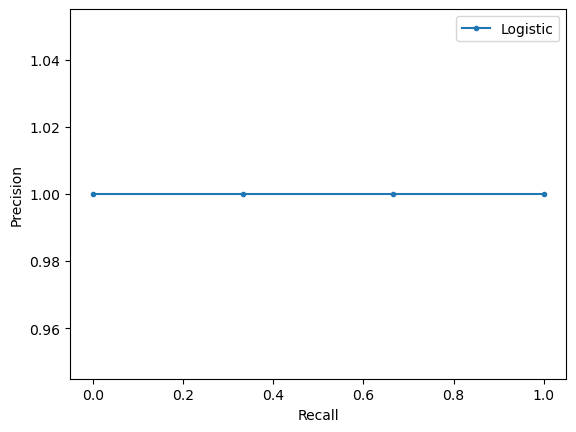

In [112]:
from sklearn.metrics import precision_recall_curve
lr_precision, lr_recall, _ = precision_recall_curve(y_test_n, y_pred_n)
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()